                                                      COVID-19 DATASET                                                                      

# Working on Real Project with Python on 'COVID-19 Dataset'

## (A part of Big Data Analysis)
# COVID-19 DATASET


## We have taken a small dataset of Covid-19, just for your understaning purpose. You have to work on the original dataset which contains about 19000 rows.
## The data used here is till 29-April-2020 and has records as on 29-April-2020.
## This data is available as a CSV file, downloaded from Kaggle.
## We will analyze this data using the Pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Data

In [2]:
df=pd.read_csv("F:\PROGRAMMING\MY PROJECTS\Datasets\Project_4_Covid_19_data.csv")

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [5]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [6]:
df.shape

(321, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


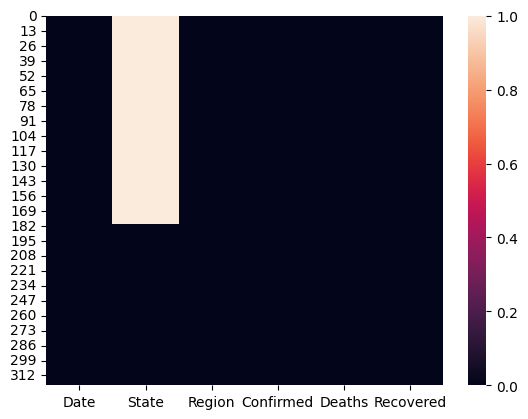

In [8]:
sns.heatmap(df.isnull())
plt.show()

<Axes: xlabel='Confirmed', ylabel='Deaths'>

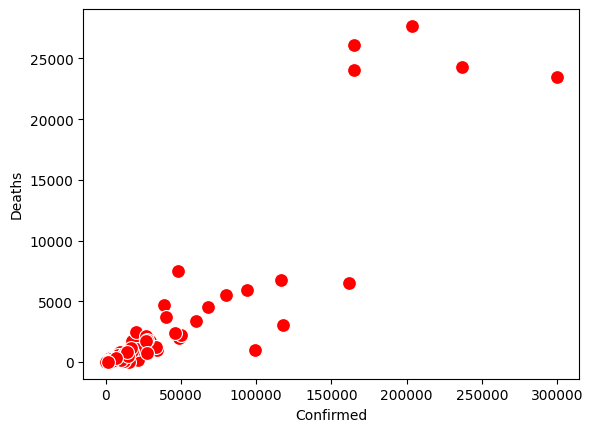

In [9]:
sns.scatterplot(x='Confirmed', y='Deaths', data=df, color='red',  s=100)

### Show the number of Confirmed , Deaths and Recovered cases in each Region.

In [10]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [11]:
df.groupby('Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

,Region,Confirmed,Deaths,Recovered
0,Afghanistan,1939,60,252
1,Albania,766,30,455
2,Algeria,3848,444,1702
3,Andorra,743,42,423
4,Angola,27,2,7
...,...,...,...,...
182,West Bank and Gaza,344,2,71
183,Western Sahara,6,0,5
184,Yemen,6,0,1
185,Zambia,97,3,54


In [12]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

In [13]:
df.groupby('Region')[['Confirmed', 'Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


In [14]:
df.shape

(321, 6)

### Remove all the records where Confirmed Cases is Less Than 10.

In [15]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [16]:
df= df[~(df.Confirmed)<10]

In [17]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


### In which Region, maximum number of Confirmed cases were recorded ?

In [18]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [19]:
df.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(5)

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

### In which Region, minimum number of Deaths cases were recorded ?

In [20]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [21]:
df.groupby('Region').Deaths.sum().sort_values().head(5)

Region
Cambodia                    0
Bhutan                      0
Dominica                    0
Central African Republic    0
Eritrea                     0
Name: Deaths, dtype: int64

### How many Confirmed , Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [22]:
df.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [23]:
df[df.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [24]:
df[df.Region == 'Yemen']

,Date,State,Region,Confirmed,Deaths,Recovered
178,4/29/2020,NaN,Yemen,6,0,1


In [25]:
df[df.Region == 'Albania']

,Date,State,Region,Confirmed,Deaths,Recovered
1,4/29/2020,NaN,Albania,766,30,455


In [26]:
df[df.Region == 'US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


### Sort the entire data wrt No. of Confirmed cases in ascending order.

In [27]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [28]:
df.sort_values(by='Confirmed', ascending=True).head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
284,4/29/2020,Recovered,Canada,0,0,20327
285,4/29/2020,Recovered,US,0,0,120720
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
305,4/29/2020,Tibet,Mainland China,1,0,1


### Sort the entire data wrt No. of Recovered cases in descending order.

In [30]:
df.sort_values(by='Recovered', ascending=False).head(15)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600


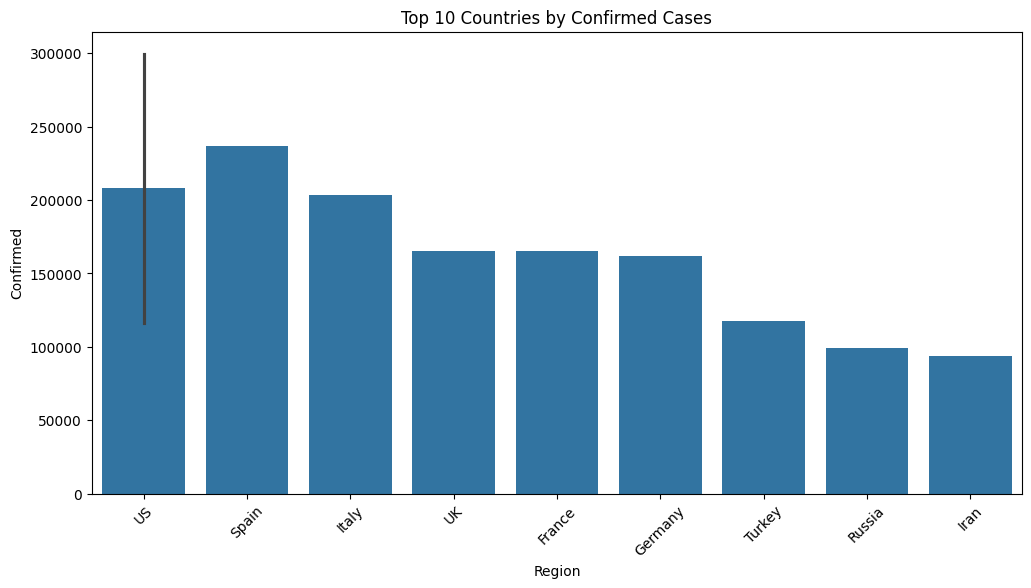

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Confirmed', data=df.sort_values(by='Confirmed', ascending=False).head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()

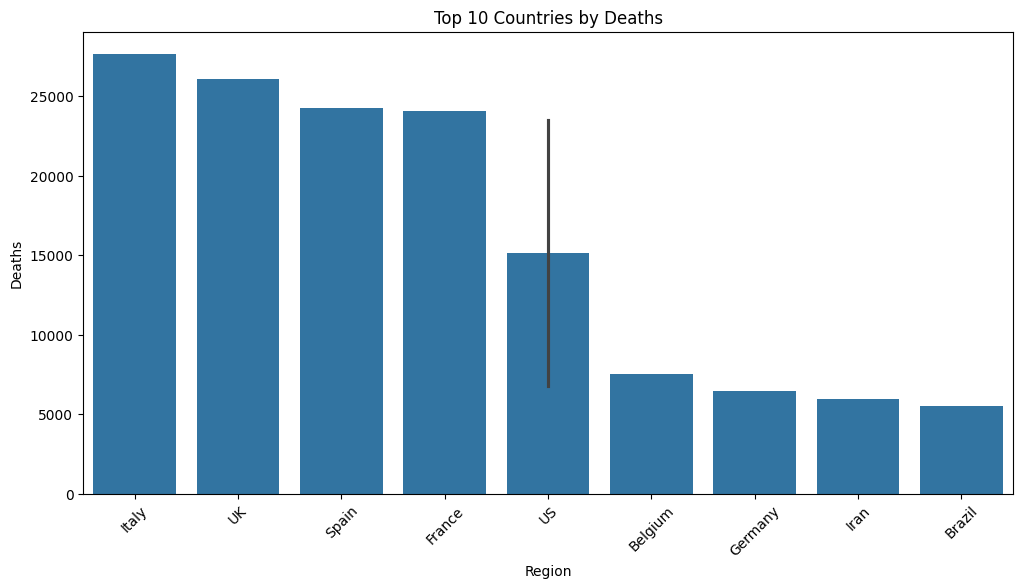

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 Countries by Deaths')
sns.barplot(x='Region', y='Deaths', data=df.sort_values(by='Deaths', ascending=False).head(10))
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Region', ylabel='Recovered'>

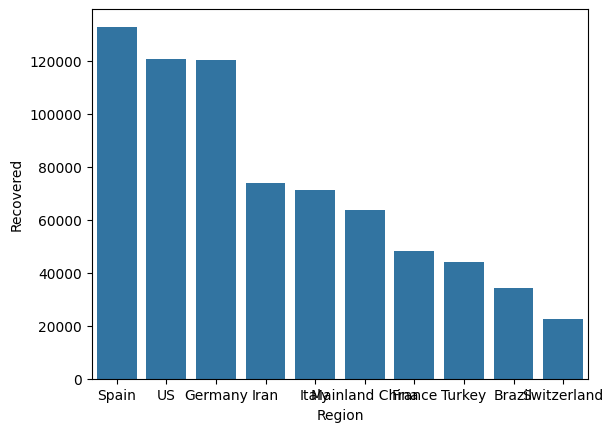

In [34]:
sns.barplot(x='Region', y='Recovered', data=df.sort_values(by='Recovered', ascending=False).head(10))

<Axes: xlabel='Confirmed', ylabel='Count'>

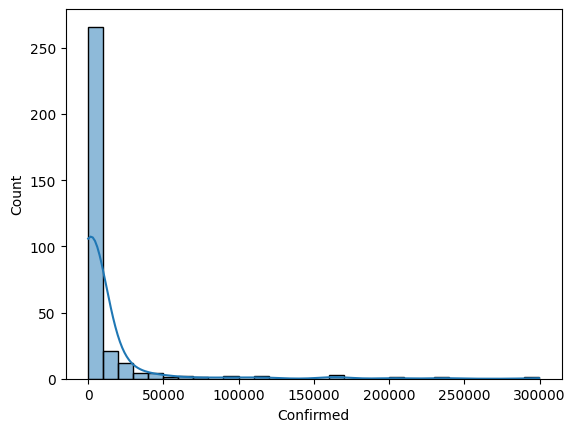

In [35]:
sns.histplot(df['Confirmed'], bins=30, kde=True)

<Axes: xlabel='Confirmed', ylabel='Deaths'>

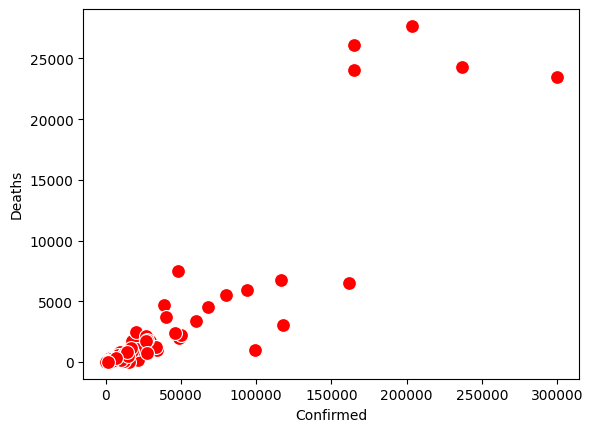

In [37]:
sns.scatterplot(x='Confirmed', y='Deaths', data=df, color='red', s=100)

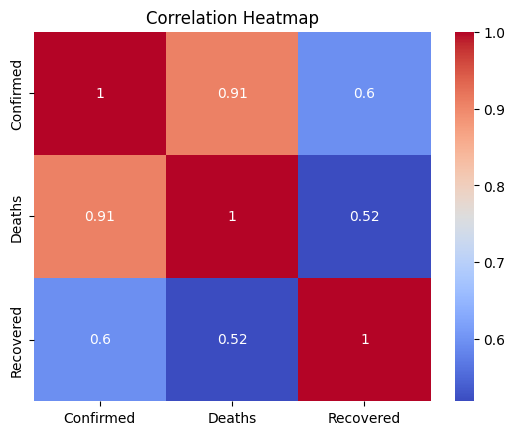

In [41]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# By:- Lucky Sharma